# Laboratorio 03 - Modelacion & Simulación

- Kristopher Javier Alvarado López
- Renatto Esteban Guzmán Sosa
- David Jonathan Aragón Vasquez

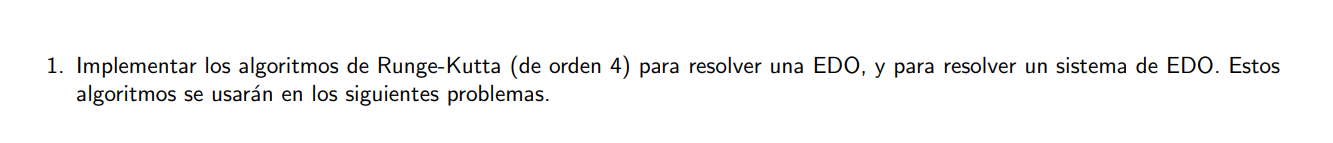

In [1]:
import numpy as np
# Runge-Kutta 4th order for systems of ODEs
def runge_kutta_system(f, y0, t0, tf, h):
    n_steps = int((tf - t0) / h)
    t_values = [t0]
    y_values = [y0]

    for i in range(n_steps):
        t = t_values[-1]
        y = y_values[-1]

        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))

        y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t_next = t + h

        t_values.append(t_next)
        y_values.append(y_next)

    return np.array(t_values), np.array(y_values)

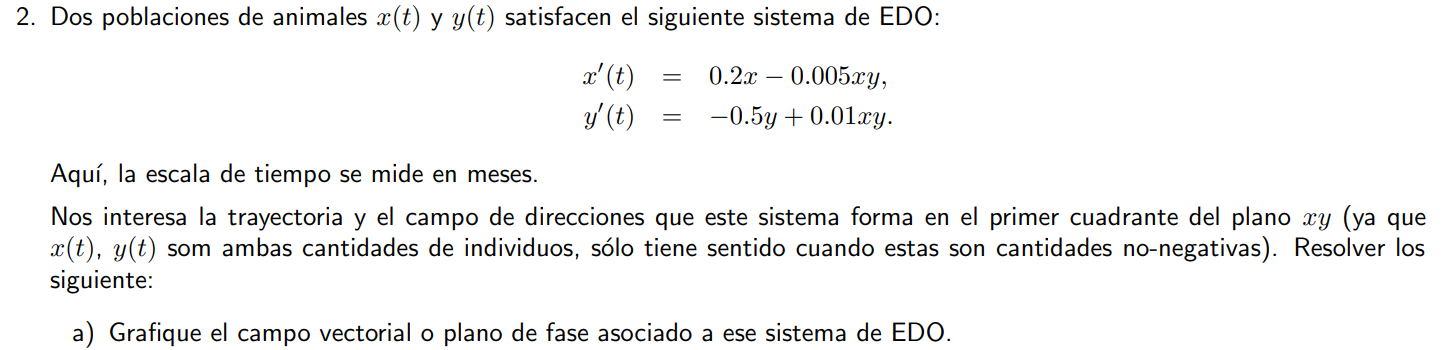

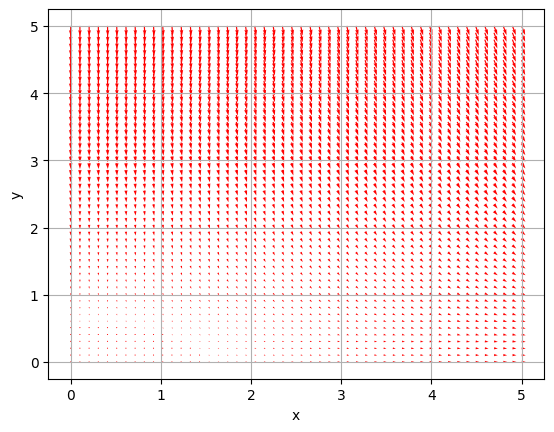

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dx(x, y):
    return 0.2*x - 0.005*x*y

def dy(x, y):
    return -0.5*y + 0.01*x*y

x = np.linspace(0, 5)
y = np.linspace(0, 5)
X, Y = np.meshgrid(x, y)

Vx = dx(X, Y)
Vy = dy(X, Y)

plt.quiver(X, Y, Vx, Vy, color='r')
plt.xlabel('x') 
plt.ylabel('y')
plt.grid(True)
plt.show()

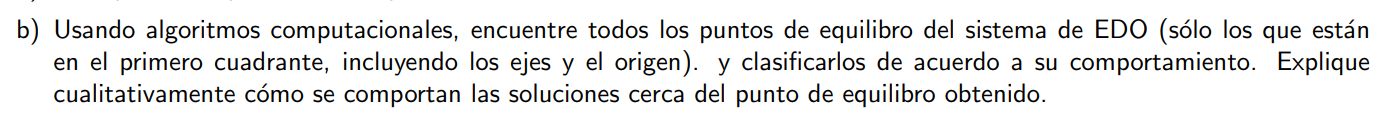

In [4]:
import sympy

x, y = sympy.symbols('x y') 

# Equations of the system
eq1 = 0.2*x - 0.005*x*y
eq2 = -0.5*y + 0.01*x*y

# Find equilibrium points by solving simultaneously
equilibrium_points = sympy.solve([eq1, eq2], x, y)

# Print equilibrium points
print(f"Puntos de equilibrio: {equilibrium_points} ")


from sympy import Matrix, diff

# Jacobian matrix 
J = Matrix([[diff(eq1, x), diff(eq1, y)], 
           [diff(eq2, x), diff(eq2, y)]])
           
# Evaluate at each equilibrium point   
print(J.evalf(subs={x:0, y:0})) 
print(J.evalf(subs={x:50, y:40}))

Puntos de equilibrio: [(0.0, 0.0), (50.0000000000000, 40.0000000000000)] 
Matrix([[0.200000000000000, 0], [0, -0.500000000000000]])
Matrix([[6.93889390390723e-18, -0.250000000000000], [0.400000000000000, 1.04083408558608e-17]])


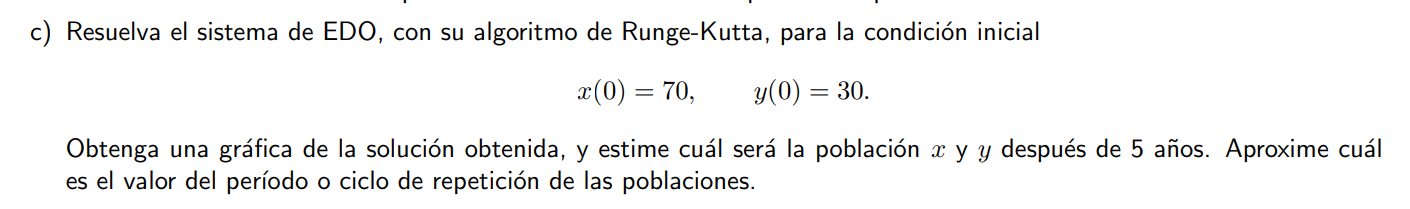

El período medio es de aproximadamente 20.13 días.


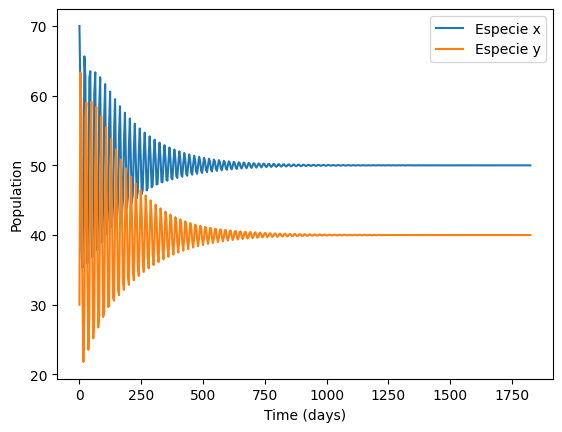

In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# System function
def f(t, y):
    x = y[0]
    y = y[1]
    return [0.2*x - 0.005*x*y, -0.5*y + 0.01*x*y]


# Initial conditions
y0 = np.array([70, 30])  # [x0, y0]
t0 = 0
tf = 5*365  # Final time (5 years in days)
h = 4  # Time step of 1 day

# Run simulation
t_values, y_values = runge_kutta_system(f, y0, t0, tf, h)

# Extract x and y values
x = y_values[:, 0]
y = y_values[:, 1]


# Encontrar picos en la población de 'x'
peaks, _ = find_peaks(x)
peak_times = t_values[peaks]


# Calcular el período medio
periods = np.diff(peak_times)
mean_period = np.mean(periods)

print(f"El período medio es de aproximadamente {mean_period:.2f} días.")

# Plot results
plt.plot(t_values, x, label="Especie x")
plt.plot(t_values, y, label="Especie y")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.show()

El período medio es de aproximadamente 20.21 días.


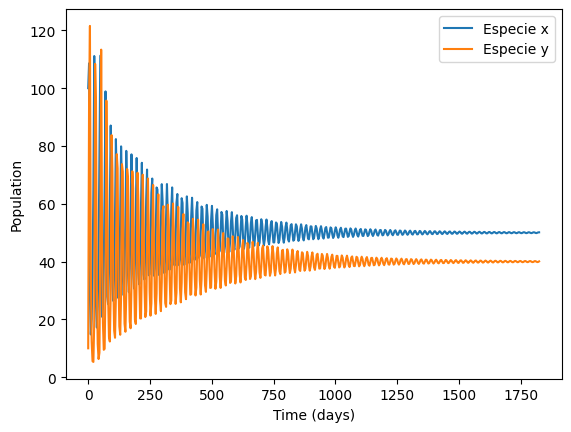

In [45]:
# Initial conditions
y0 = np.array([100, 10])  # [x0, y0]
t0 = 0
tf = 5*365  # Final time (5 years in days)
h = 3.5  # Time step of 1 day

# Run simulation
t_values, y_values = runge_kutta_system(f, y0, t0, tf, h)

# Extract x and y values
x = y_values[:, 0]
y = y_values[:, 1]

# Encontrar picos en la población de 'x'
peaks, _ = find_peaks(x)
peak_times = t_values[peaks]

# Calcular el período medio
periods = np.diff(peak_times)
mean_period = np.mean(periods)

print(f"El período medio es de aproximadamente {mean_period:.2f} días.")

# Plot results
plt.plot(t_values, x, label="Especie x")
plt.plot(t_values, y, label="Especie y")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.show()

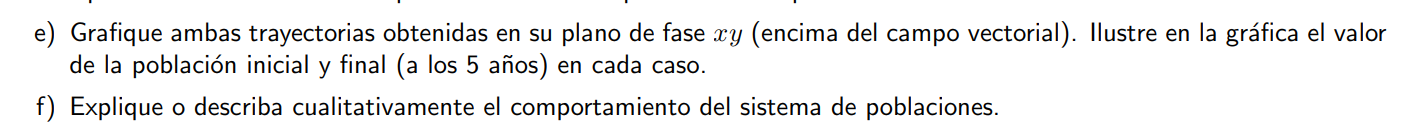

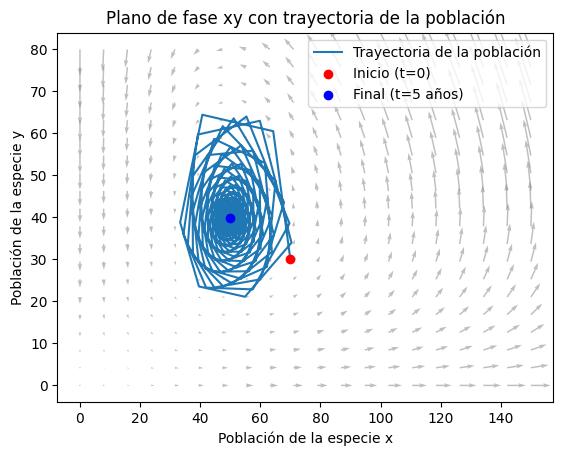

In [47]:
# Condiciones iniciales
y0 = np.array([70, 30])  # [x0, y0]
t0 = 0
tf = 5 * 365  # Tiempo final (5 años en días)
h = 3.5  # Paso de tiempo

# Ejecutar la simulación
t_values, y_values = runge_kutta_system(f, y0, t0, tf, h)

# Extraer valores de x e y
x = y_values[:, 0]
y = y_values[:, 1]

# Crear un campo vectorial en el plano xy
X, Y = np.meshgrid(np.linspace(0, 150, 20), np.linspace(0, 80, 20))
U, V = f(0, [X, Y])

# Graficar el campo vectorial
plt.quiver(X, Y, U, V, color='gray', alpha=0.5)

# Graficar la trayectoria de la población
plt.plot(x, y, label="Trayectoria de la población")

# Marcar el punto inicial
plt.scatter([y0[0]], [y0[1]], color='red', label="Inicio (t=0)", zorder=5)

# Marcar el punto final
plt.scatter([x[-1]], [y[-1]], color='blue', label=f"Final (t={tf//365} años)", zorder=5)

plt.xlabel("Población de la especie x")
plt.ylabel("Población de la especie y")
plt.legend()
plt.title("Plano de fase xy con trayectoria de la población")
plt.show()

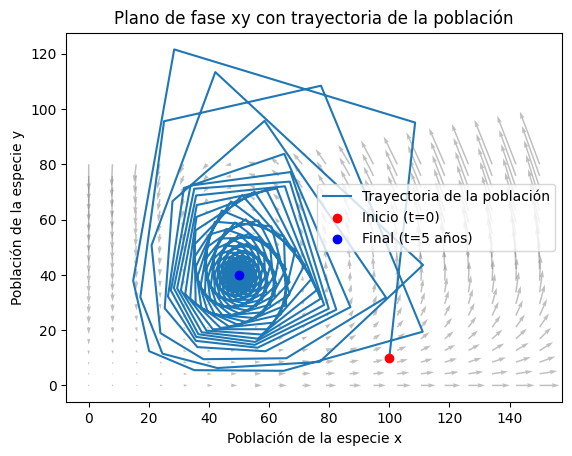

In [46]:
# Condiciones iniciales
y0 = np.array([100, 10])  # [x0, y0]
t0 = 0
tf = 5 * 365  # Tiempo final (5 años en días)
h = 3.5  # Paso de tiempo

# Ejecutar la simulación
t_values, y_values = runge_kutta_system(f, y0, t0, tf, h)

# Extraer valores de x e y
x = y_values[:, 0]
y = y_values[:, 1]

# Crear un campo vectorial en el plano xy
X, Y = np.meshgrid(np.linspace(0, 150, 20), np.linspace(0, 80, 20))
U, V = f(0, [X, Y])

# Graficar el campo vectorial
plt.quiver(X, Y, U, V, color='gray', alpha=0.5)

# Graficar la trayectoria de la población
plt.plot(x, y, label="Trayectoria de la población")

# Marcar el punto inicial
plt.scatter([y0[0]], [y0[1]], color='red', label="Inicio (t=0)", zorder=5)

# Marcar el punto final
plt.scatter([x[-1]], [y[-1]], color='blue', label=f"Final (t={tf//365} años)", zorder=5)

plt.xlabel("Población de la especie x")
plt.ylabel("Población de la especie y")
plt.legend()
plt.title("Plano de fase xy con trayectoria de la población")
plt.show()

La trayectoria en el plano 𝑥𝑦 muestra oscilaciones alrededor de un punto de equilibrio, lo que indica que las poblaciones de ambas especies están en un ciclo de depredador-presa o competencia. Estas oscilaciones son amortiguadas, es decir, la amplitud de las oscilaciones disminuye con el tiempo, lo que eventualmente lleva a las poblaciones hacia un estado estacionario.

El sistema parece estar acercándose a un punto de equilibrio en el plano  xy, donde las tasas de cambio de ambas especies se equilibran. Este punto es donde las poblaciones dejarían de oscilar y se mantendrían constantes. En el gráfico, esto se observa como la concentración de la trayectoria en un punto al final del período de simulación (marcado en azul).

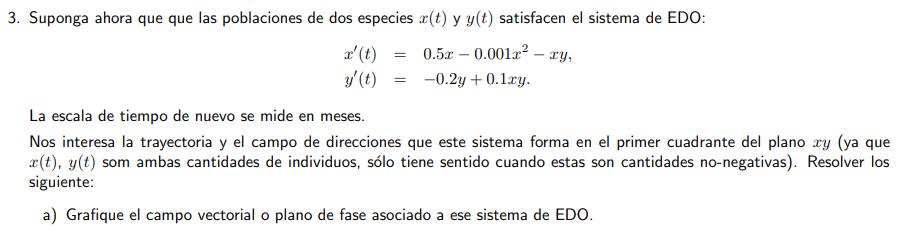

C:\Users\acer\AppData\Local\Temp\ipykernel_29316\3268547698.py:45: RuntimeWarning: invalid value encountered in scalar divide
  U[i, j] = dxdt / norm
C:\Users\acer\AppData\Local\Temp\ipykernel_29316\3268547698.py:46: RuntimeWarning: invalid value encountered in scalar divide
  V[i, j] = dydt / norm


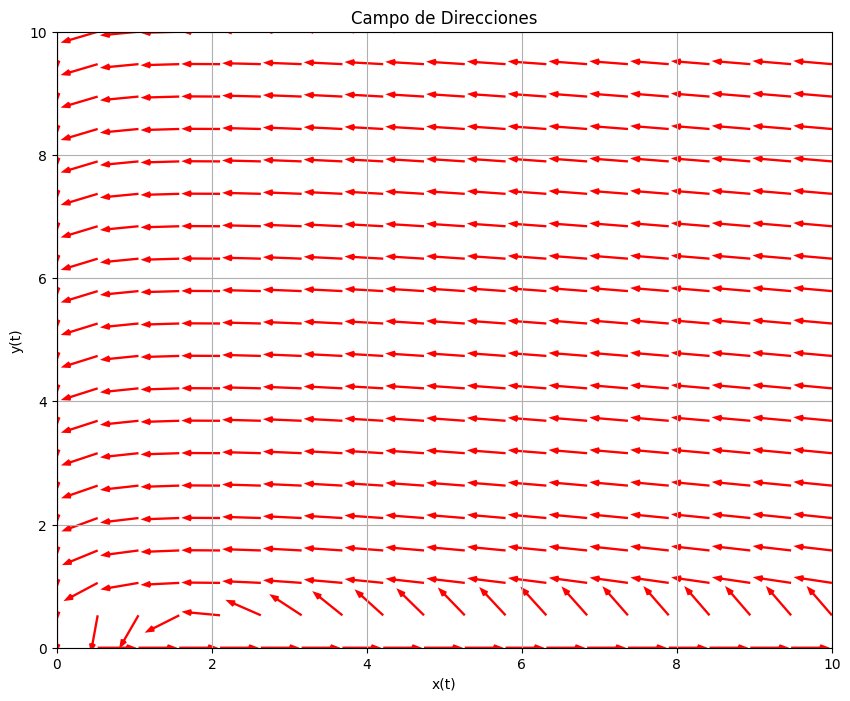

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(t, y):
    x, y = y
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return [dxdt, dydt]

# Define parameters for Runge-Kutta integration
def runge_kutta_system(f, y0, t0, tf, h):
    n_steps = int((tf - t0) / h)
    t_values = [t0]
    y_values = [y0]

    for i in range(n_steps):
        t = t_values[-1]
        y = y_values[-1]

        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))

        y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t_next = t + h

        t_values.append(t_next)
        y_values.append(y_next)

    return np.array(t_values), np.array(y_values)

# Parameters for the plot
x_values = np.linspace(0, 10, 20)
y_values = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x_values, y_values)

# Compute the direction field
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dxdt, dydt = system(0, [X[i, j], Y[i, j]])
        norm = np.sqrt(dxdt**2 + dydt**2)
        U[i, j] = dxdt / norm
        V[i, j] = dydt / norm

# Plot the direction field
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, headlength=4, scale=20, color='r')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Campo de Direcciones')
plt.grid()
plt.show()


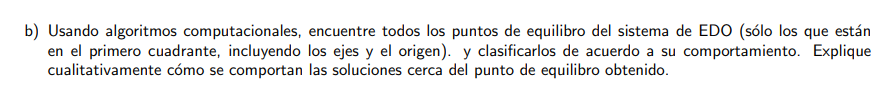

In [8]:
from scipy.optimize import fsolve

# Define the system of equations
def equilibrium_equations(vars):
    x, y = vars
    eq1 = 0.5 * x - 0.001 * x**2 - x * y
    eq2 = -0.2 * y + 0.1 * x * y
    return [eq1, eq2]

# Guess for the initial points
initial_guesses = [(0, 0), (1, 1), (10, 10)]

# Solve the system of equations
solutions = [fsolve(equilibrium_equations, guess) for guess in initial_guesses]

# Filter solutions to keep only those in the first quadrant
solutions = [sol for sol in solutions if sol[0] >= 0 and sol[1] >= 0]

print("Puntos de equilibrio en el primer cuadrante:", solutions)


Puntos de equilibrio en el primer cuadrante: [array([0., 0.]), array([2.   , 0.498]), array([2.   , 0.498])]


In [9]:
from numpy.linalg import eig

def jacobian(x, y):
    return np.array([
        [0.5 - 0.002 * x - y, -x],
        [0.1 * y, -0.2 + 0.1 * x]
    ])

# Classify equilibrium points
for sol in solutions:
    x, y = sol
    J = jacobian(x, y)
    eigenvalues, _ = eig(J)
    print(f"Jacobian at {sol}:")
    print(J)
    print(f"Eigenvalues: {eigenvalues}")
    if np.all(eigenvalues < 0):
        print("Estable")
    elif np.any(eigenvalues > 0):
        print("Inestable")
    else:
        print("Silla o Punto de Inflexión")


Jacobian at [0. 0.]:
[[ 0.5 -0. ]
 [ 0.  -0.2]]
Eigenvalues: [ 0.5 -0.2]
Inestable
Jacobian at [2.    0.498]:
[[-2.00000000e-03 -2.00000000e+00]
 [ 4.98000000e-02  3.05311332e-16]]
Eigenvalues: [-0.001+0.31559309j -0.001-0.31559309j]
Estable
Jacobian at [2.    0.498]:
[[-2.00000000e-03 -2.00000000e+00]
 [ 4.98000000e-02  8.32667268e-17]]
Eigenvalues: [-0.001+0.31559309j -0.001-0.31559309j]
Estable


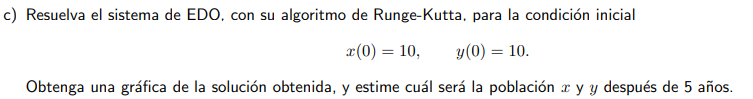

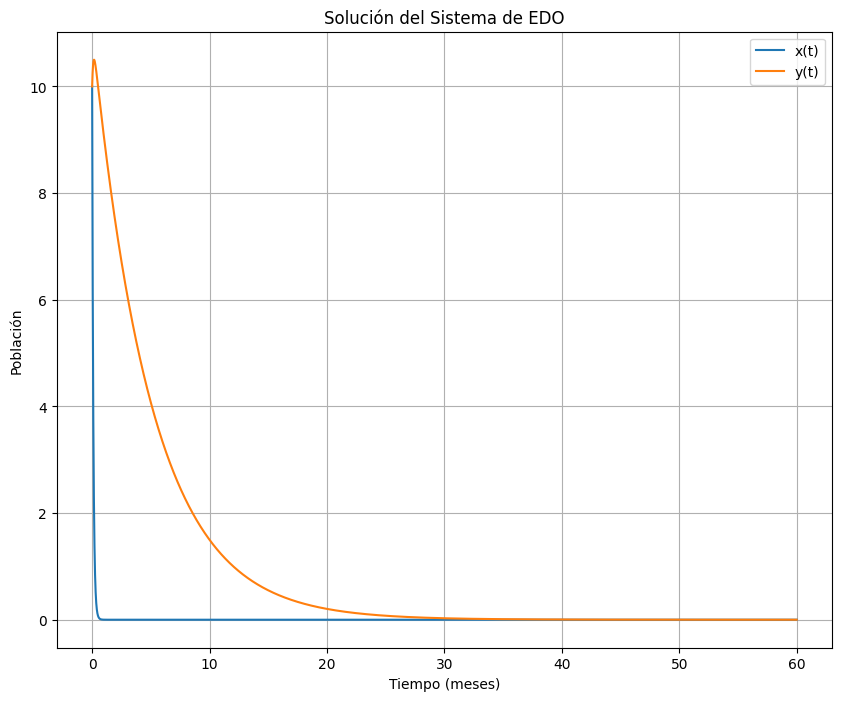

Población x después de 5 años: 1.0786265144275354e-10
Población y después de 5 años: 6.803030315041728e-05


In [10]:
# Definir el sistema de ecuaciones
def sistema(t, y):
    x, y = y
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return np.array([dxdt, dydt])

# Condiciones iniciales
y0 = np.array([10, 10])
t0 = 0
tf = 60  # 5 años = 60 meses
h = 0.01  # paso de tiempo más pequeño

# Resolver usando Runge-Kutta
t_values, y_values = runge_kutta_system(sistema, y0, t0, tf, h)

# Plot the solution
plt.figure(figsize=(10, 8))
plt.plot(t_values, y_values[:, 0], label='x(t)')
plt.plot(t_values, y_values[:, 1], label='y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('Solución del Sistema de EDO')
plt.legend()
plt.grid()
plt.show()

# Estimate population after 5 years
x_5_years = y_values[-1, 0]
y_5_years = y_values[-1, 1]
print(f"Población x después de 5 años: {x_5_years}")
print(f"Población y después de 5 años: {y_5_years}")


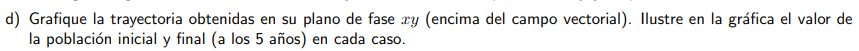

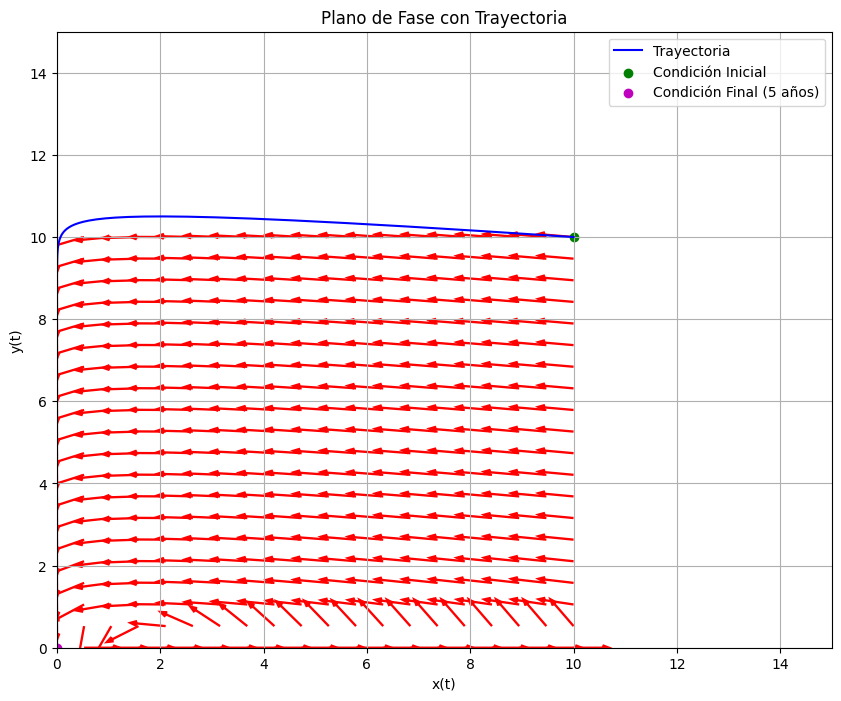

In [11]:
# Plot the direction field and trajectory
plt.figure(figsize=(10, 8))

# Plot the direction field
plt.quiver(X, Y, U, V, headlength=4, scale=20, color='r')

# Plot the trajectory
plt.plot(y_values[:, 0], y_values[:, 1], label='Trayectoria', color='b')

# Initial and final points
plt.scatter([10], [10], color='g', label='Condición Inicial')
plt.scatter([x_5_years], [y_5_years], color='m', label='Condición Final (5 años)')

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Plano de Fase con Trayectoria')
plt.legend()
plt.grid()
plt.show()


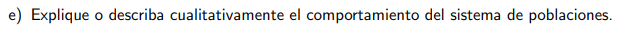

Estabilidad de los Puntos de Equilibrio: Dependiendo de los eigenvalores de la matriz jacobiana en cada punto de equilibrio, puedes clasificar los puntos como estables, inestables o tipos de silla.

Comportamiento de las Soluciones:

Estabilidad: Las soluciones tienden a estabilizarse alrededor de puntos de equilibrio estables.
Inestabilidad: Si hay puntos inestables, las soluciones divergen de esos puntos.
Comportamiento Cíclico: Si hay comportamientos oscilatorios, pueden indicar un ciclo límite.

## Ejercicio 4

### Inciso a)

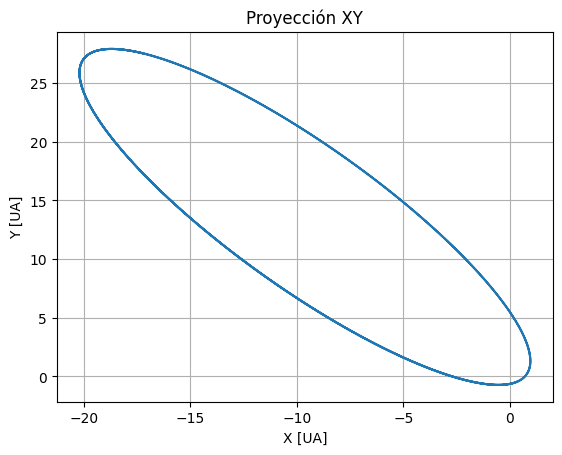

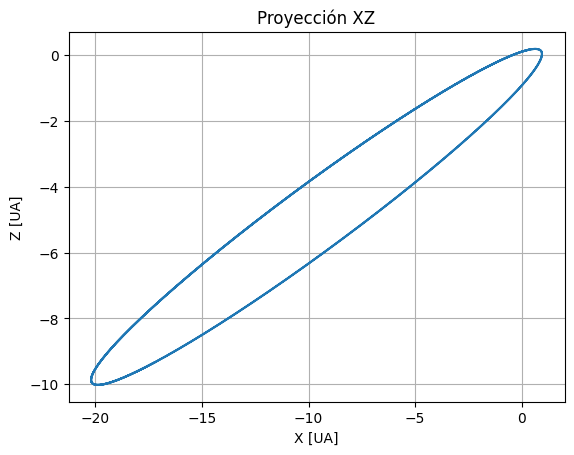

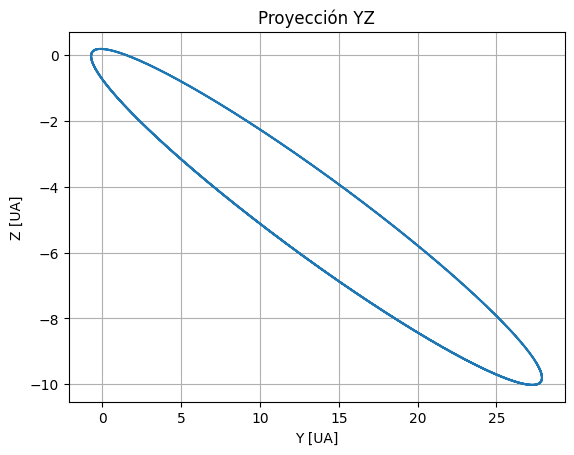

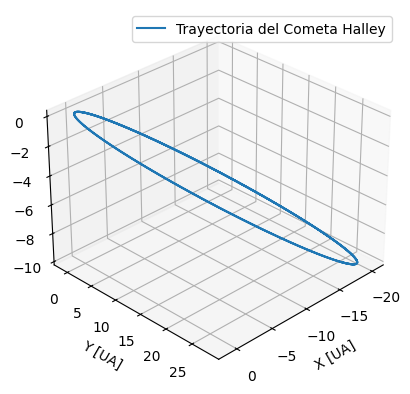

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros iniciales
P0 = np.array([0.325514, -0.459460, 0.166229]) 
v0 = np.array([-9.096111, -6.916686, -1.305721])
mu = 4 * np.pi**2 # Constante gravitacional 

# Función para resolver las ecuaciones diferenciales
def comet_motion(t, Y):
    x, y, z, vx, vy, vz = Y
    r = np.sqrt(x**2 + y**2 + z**2)
    ax = -mu*x/r**3
    ay = -mu*y/r**3
    az = -mu*z/r**3
    return np.array([vx, vy, vz, ax, ay, az])


# Condiciones iniciales
Y0 = np.concatenate((P0, v0))

# Tiempo de simulación (en años)
t0, tf = 0, 200  # Un periodo completo del cometa Halley (76 años)
dt = 0.001  # Paso de tiempo

# Resolver las ecuaciones diferenciales con Runge-Kutta
times, trajectory = runge_kutta_system(comet_motion, Y0, t0, tf, dt)

# Extraer posiciones
x, y, z = trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]


# Graficar las proyecciones en el plano XY
plt.figure()
plt.plot(x, y)
plt.xlabel('X [UA]')
plt.ylabel('Y [UA]')
plt.title('Proyección XY')
plt.grid(True)

# Graficar las proyecciones en el plano XZ
plt.figure()
plt.plot(x, z)
plt.xlabel('X [UA]')
plt.ylabel('Z [UA]')
plt.title('Proyección XZ')
plt.grid(True)

# Graficar las proyecciones en el plano YZ
plt.figure()
plt.plot(y, z)
plt.xlabel('Y [UA]')
plt.ylabel('Z [UA]')
plt.title('Proyección YZ')
plt.grid(True)

# Graficar la trayectoria
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Trayectoria del Cometa Halley")
ax.set_xlabel('X [UA]')
ax.set_ylabel('Y [UA]')
ax.view_init(elev=30, azim=45)
ax.set_zlabel('Z [UA]')
ax.legend()

plt.show()

### Inciso b)

In [4]:
# Encontrar el índice correspondiente a t = 100 años y t = 200 años
index_2086 = int(100 / dt)
index_2186 = int(200 / dt)

# Obtener la posición y velocidad en t = 100 años (2086)
position_2086 = trajectory[index_2086, 0:3]
velocity_2086 = trajectory[index_2086, 3:6]

# Obtener la posición y velocidad en t = 200 años (2186)
position_2186 = trajectory[index_2186, 0:3]
velocity_2186 = trajectory[index_2186, 3:6]

# Imprimir resultados
print(f"Posición en 2086 (t=100 años): {position_2086}")
print(f"Velocidad en 2086 (t=100 años): {velocity_2086}")

print(f"Posición en 2186 (t=200 años): {position_2186}")
print(f"Velocidad en 2186 (t=200 años): {velocity_2186}")


Posición en 2086 (t=100 años): [-19.84860006  23.55071754  -9.38121432]
Velocidad en 2086 (t=100 años): [-0.12558201  0.47299677 -0.11411982]
Posición en 2186 (t=200 años): [-17.21455143  27.51329508  -9.33434692]
Velocidad en 2186 (t=200 años): [ 0.32380015 -0.14394983  0.11243139]


### Inciso c)

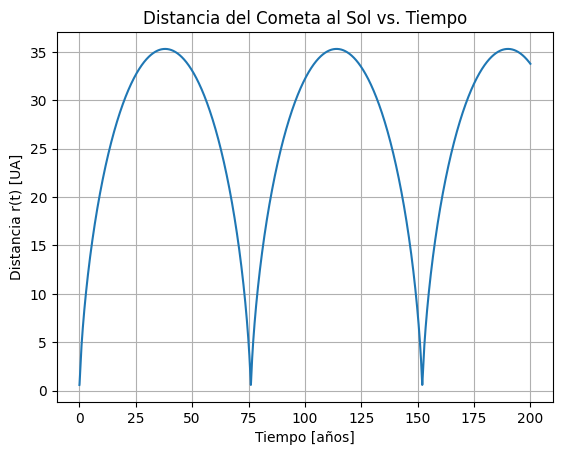

Período estimado del cometa: 76.03 años


In [5]:
# Calcular la distancia r(t) para cada instante de tiempo
r = np.sqrt(x**2 + y**2 + z**2)

# Graficar r(t) en función del tiempo
plt.figure()
plt.plot(times, r)
plt.xlabel('Tiempo [años]')
plt.ylabel('Distancia r(t) [UA]')
plt.title('Distancia del Cometa al Sol vs. Tiempo')
plt.grid(True)
plt.show()

# Estimar el período del cometa
from scipy.signal import find_peaks

# Encontrar los picos de r(t), que corresponden a los afelios (máxima distancia)
peaks, _ = find_peaks(r)

# Calcular la diferencia de tiempo entre picos consecutivos
periods = np.diff(times[peaks])

# Estimar el período medio
periodo_medio = np.mean(periods)
print(f"Período estimado del cometa: {periodo_medio:.2f} años")
